# 6.2: Exploring Relationships

In [158]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [160]:
# define path
path = '/Users/LuisD/Documents/CareerFoundry/Achievement 6/AIR BNB Analysis'

In [162]:
#import
listings = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'listings_cleaned.csv'), index_col = False)

listings_details = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'listings_details_cleaned.csv'), index_col = False)

calendar = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'calendar_cleaned.csv'), index_col = False)

reviews = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'reviews_cleaned.csv'), index_col = False)

reviews_details = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'reviews_details_cleaned.csv'), index_col = False)

neighbor = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'reviews_neighborhood_cleaned.csv'), index_col = False)


In [164]:
%matplotlib inline

In [166]:
# New column with month name
calendar['month'] = pd.to_datetime(calendar['date']).dt.month_name()

#Grouping by id, month and availability
calendar2=pd.DataFrame(calendar.groupby(['listing_id','month','available']).count()['date']).reset_index()

# Correction names and data types
calendar2.rename(columns={'date':'total','listing_id':'id'},inplace=True)
calendar2['id'] = calendar2['id'].astype('str')

# Export
calendar2.to_csv('calendar2.csv',index=False)

In [167]:
# selection of variables from listings
listings2 = listings[['id','name','neighbourhood','room_type','price',
                      'number_of_reviews','reviews_per_month','availability_365']]

In [168]:
#List of columns that i want to use

listings_details_to_use = ['id','host_is_superhost','neighbourhood', 'property_type','room_type','bedrooms',
                 'price','security_deposit','cleaning_fee', 
                  'number_of_reviews','reviews_per_month']

not_in_listings_details_columns = []

# List of columns that are not repeated 

for column in listings_details.columns:
    if column not in listings2.columns:
        not_in_listings_details_columns.append(column)
        
listings_details_to_use2 = []   

# Columns that i want to use and are not repeated with listings

for column in listings_details_to_use:
    if column in not_in_listings_details_columns:
        listings_details_to_use2.append(column)
        
listings_details_to_use2.append('id')

# Leave only the columns that i want

listings_details2 = listings_details[listings_details_to_use2]

In [172]:
# Merge of the two listings tables
listings_complete = listings2.merge(listings_details2,on='id')

In [174]:
listings_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20030 non-null  int64  
 1   name               20030 non-null  object 
 2   neighbourhood      20030 non-null  object 
 3   room_type          20030 non-null  object 
 4   price              20030 non-null  int64  
 5   number_of_reviews  20030 non-null  int64  
 6   reviews_per_month  20030 non-null  object 
 7   availability_365   20030 non-null  int64  
 8   host_is_superhost  20026 non-null  object 
 9   property_type      20030 non-null  object 
 10  bedrooms           20022 non-null  float64
 11  security_deposit   13864 non-null  object 
 12  cleaning_fee       16401 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 2.0+ MB


In [176]:
listings_complete

,id,name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,property_type,bedrooms,security_deposit,cleaning_fee
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,248,2.1,44,t,Apartment,1.0,$100.00,$50.00
1,3209,"Quiet apt near center, great view",Westerpark,Entire home/apt,160,42,1.03,47,f,Apartment,2.0,$300.00,$40.00
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,Centrum-Oost,Entire home/apt,80,233,2.18,198,f,Townhouse,1.0,NaN,NaN
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,Entire home/apt,125,1,0.09,141,f,Apartment,1.0,$300.00,$40.00
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,Private room,150,171,2.03,199,t,Houseboat,1.0,$0.00,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,30576148,Family House City + free Parking+garden (160 m2),Watergraafsmeer,Entire home/apt,340,0,never reviewed,11,f,House,3.0,$500.00,$60.00
20026,30577727,Home Sweet Home in Indische Buurt,Oostelijk Havengebied - Indische Buurt,Entire home/apt,150,0,never reviewed,16,f,Apartment,2.0,$0.00,$25.00
20027,30578037,Amsterdam Cozy apartment nearby center,Oud-Oost,Entire home/apt,80,0,never reviewed,210,f,Apartment,1.0,NaN,NaN
20028,30579673,Home Sweet Home for a Guest or a Couple,Oostelijk Havengebied - Indische Buurt,Private room,55,0,never reviewed,31,f,Apartment,1.0,NaN,NaN


In [178]:
listings_complete["reviews_per_month"] = listings_complete["reviews_per_month"].replace("never reviewed", 0)

In [180]:
listings_complete["reviews_per_month"] = pd.to_numeric(listings_complete["reviews_per_month"], errors="coerce").fillna(0)

In [182]:
listings_complete

,id,name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,property_type,bedrooms,security_deposit,cleaning_fee
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,248,2.10,44,t,Apartment,1.0,$100.00,$50.00
1,3209,"Quiet apt near center, great view",Westerpark,Entire home/apt,160,42,1.03,47,f,Apartment,2.0,$300.00,$40.00
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,Centrum-Oost,Entire home/apt,80,233,2.18,198,f,Townhouse,1.0,NaN,NaN
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,Entire home/apt,125,1,0.09,141,f,Apartment,1.0,$300.00,$40.00
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,Private room,150,171,2.03,199,t,Houseboat,1.0,$0.00,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,30576148,Family House City + free Parking+garden (160 m2),Watergraafsmeer,Entire home/apt,340,0,0.00,11,f,House,3.0,$500.00,$60.00
20026,30577727,Home Sweet Home in Indische Buurt,Oostelijk Havengebied - Indische Buurt,Entire home/apt,150,0,0.00,16,f,Apartment,2.0,$0.00,$25.00
20027,30578037,Amsterdam Cozy apartment nearby center,Oud-Oost,Entire home/apt,80,0,0.00,210,f,Apartment,1.0,NaN,NaN
20028,30579673,Home Sweet Home for a Guest or a Couple,Oostelijk Havengebied - Indische Buurt,Private room,55,0,0.00,31,f,Apartment,1.0,NaN,NaN


In [184]:
listings_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20030 non-null  int64  
 1   name               20030 non-null  object 
 2   neighbourhood      20030 non-null  object 
 3   room_type          20030 non-null  object 
 4   price              20030 non-null  int64  
 5   number_of_reviews  20030 non-null  int64  
 6   reviews_per_month  20030 non-null  float64
 7   availability_365   20030 non-null  int64  
 8   host_is_superhost  20026 non-null  object 
 9   property_type      20030 non-null  object 
 10  bedrooms           20022 non-null  float64
 11  security_deposit   13864 non-null  object 
 12  cleaning_fee       16401 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [186]:
# Ensure column is a string before applying .str methods
listings_complete["security_deposit"] = (
    listings_complete["security_deposit"]
    .astype(str)  # Convert to string first
    .str.replace(r"[\$,]", "", regex=True)  # Remove $ and commas
    .replace("nan", "0")  # Replace 'nan' string with '0'
    .astype(float)  # Convert to float
)

listings_complete["cleaning_fee"] = (
    listings_complete["cleaning_fee"]
    .astype(str)  # Convert to string first
    .str.replace(r"[\$,]", "", regex=True)  # Remove $ and commas
    .replace("nan", "0")  # Replace 'nan' string with '0'
    .astype(float)  # Convert to float
)

In [188]:
listings_complete['id'] = listings_complete['id'].astype('str')


In [190]:
# Export
listings_complete.to_csv('listings_complete.csv',index=False)

In [194]:
listings_complete.describe()

,price,number_of_reviews,reviews_per_month,availability_365,bedrooms,security_deposit,cleaning_fee
count,20030.000000,20030.000000,20030.000000,20030.000000,20022.00000,20030.000000,20030.000000
mean,152.181178,21.560459,0.934503,59.913679,1.44506,153.573789,32.156415
std,145.828976,43.240292,1.297465,104.027710,0.88568,301.000436,26.665581
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,96.000000,3.000000,0.170000,0.000000,1.00000,0.000000,10.000000
50%,125.000000,8.000000,0.510000,3.000000,1.00000,90.500000,30.000000
75%,175.000000,22.000000,1.090000,67.000000,2.00000,250.000000,49.000000
max,8500.000000,695.000000,11.850000,365.000000,12.00000,4736.000000,531.000000


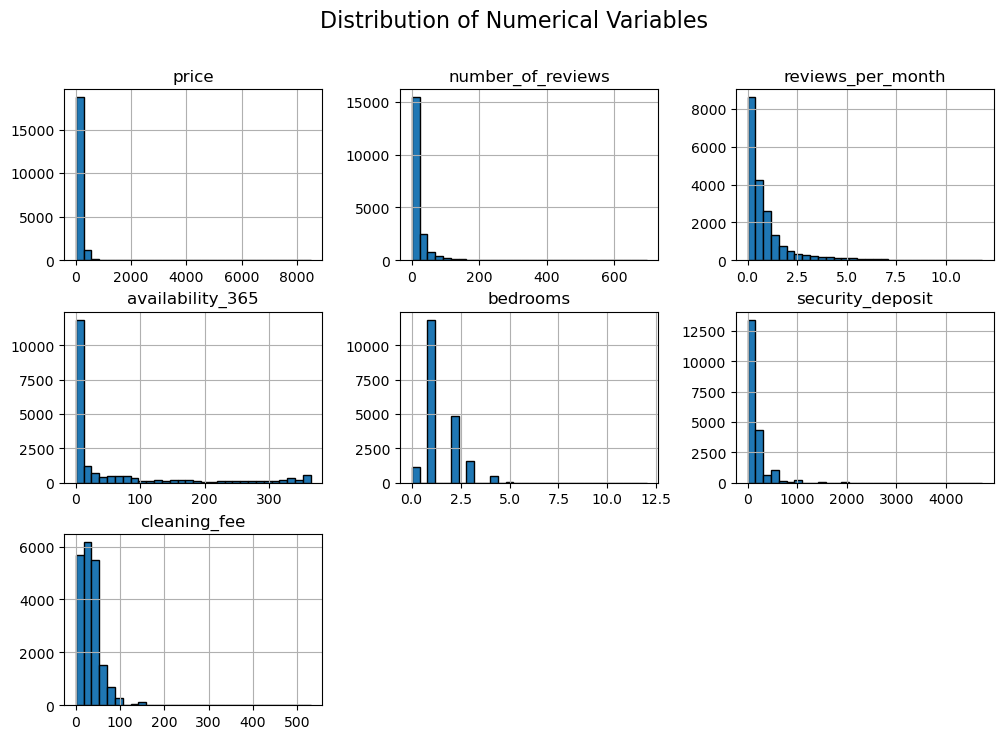

In [196]:
import matplotlib.pyplot as plt

listings_complete.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

In [198]:
listings_complete['neighbourhood'].value_counts()
listings_complete['room_type'].value_counts()
listings_complete['host_is_superhost'].value_counts()
listings_complete['property_type'].value_counts()

property_type
Apartment                 15582
House                      1523
Townhouse                   649
Bed and breakfast           455
Loft                        384
Boat                        372
Condominium                 323
Houseboat                   225
Guest suite                 152
Aparthotel                   73
Serviced apartment           63
Other                        51
Guesthouse                   43
Villa                        32
Boutique hotel               28
Cabin                        14
Cottage                      12
Bungalow                     12
Hotel                         7
Casa particular (Cuba)        5
Tiny house                    5
Hostel                        4
Barn                          4
Chalet                        3
Campsite                      2
Camper/RV                     2
Lighthouse                    1
Nature lodge                  1
Tent                          1
Earth house                   1
Castle                    

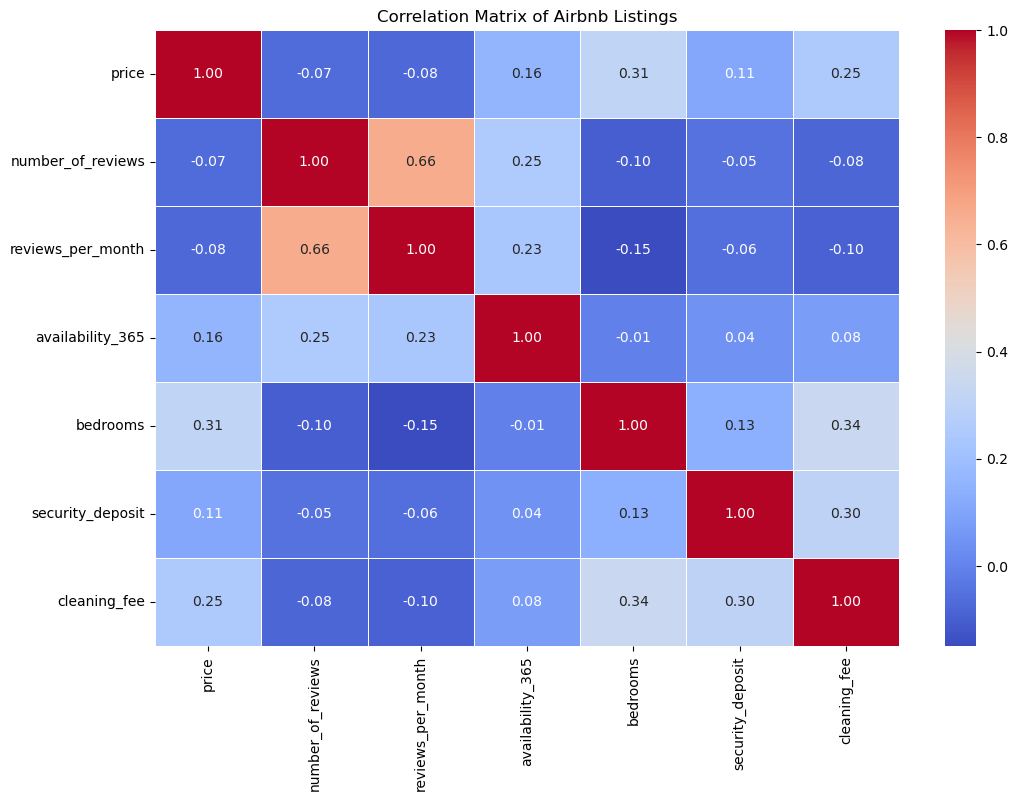

In [200]:
# Compute correlation matrix for only numeric columns
corr_matrix = listings_complete.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Airbnb Listings")
plt.show()

price vs. bedrooms (0.31) - There is a moderate positive correlation between the price of a listing and the number of bedrooms.
cleaning_fee vs. price (0.25) - A positive correlation suggests that listings with higher prices tend to have higher cleaning fees. However, this relationship is not very strong, meaning some expensive listings might still have low cleaning fees.
availability_365 vs. reviews (0.25) - Listings available for more days per year tend to receive more reviews.
reviews_per_month vs. number_of_reviews (0.66) - This is the strongest correlation. This suggests popular listings continue to attract more guests over time.
price vs. number_of_reviews (-0.07) Very weak negative correlation, meaning more reviews do not necessarily mean a higher price.
price vs. reviews per month (-0.08) - low correlation, showing that review frequency does not significantly impact pricing.
price vs. security deposit  (0.11) - a weak positive correlation, suggesting some expensive listings might charge a security deposit.


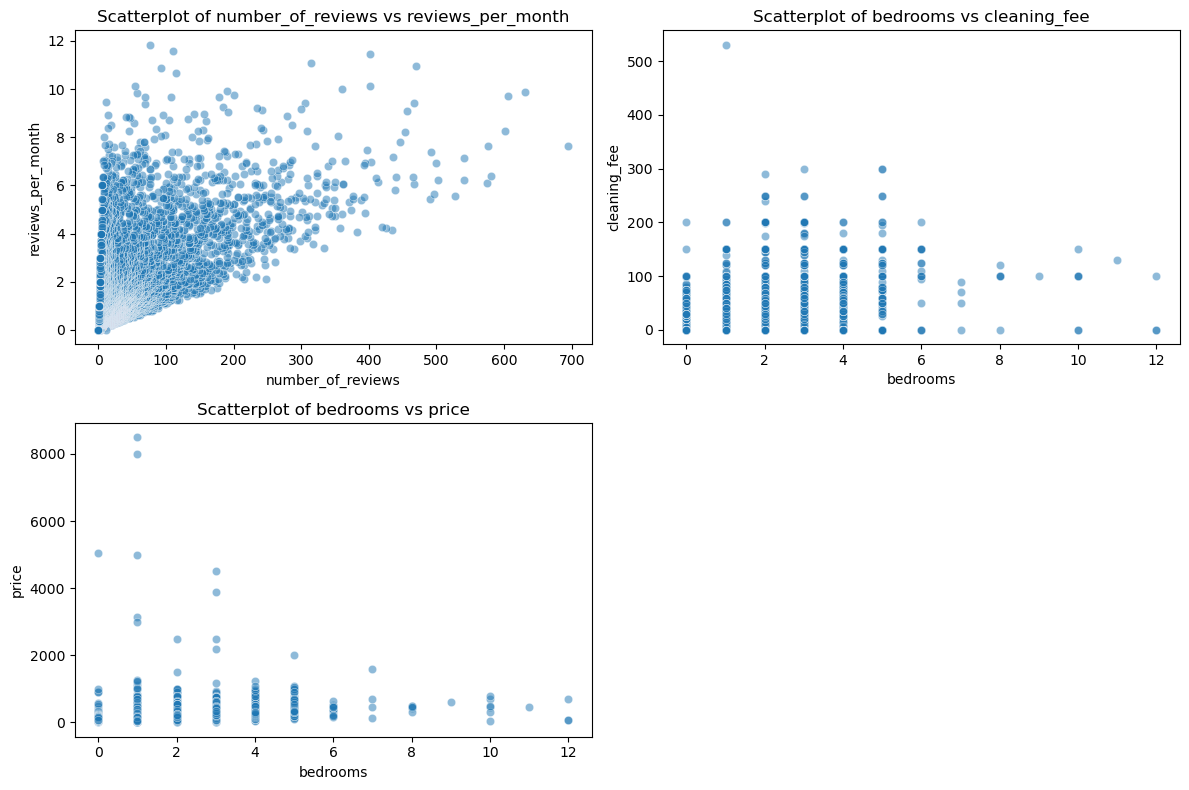

In [203]:
# Define the strongest correlated variable pairs
strong_corr_pairs = [
    ('number_of_reviews', 'reviews_per_month'),
    ('bedrooms', 'cleaning_fee'),
    ('bedrooms', 'price')
]

# Set up figure size
plt.figure(figsize=(12, 8))

# Create subplots for each correlated variable pair
for i, (x_var, y_var) in enumerate(strong_corr_pairs, 1):
    plt.subplot(2, 2, i)  # Arrange in a grid
    sns.scatterplot(data=listings_complete, x=x_var, y=y_var, alpha=0.5)
    plt.title(f'Scatterplot of {x_var} vs {y_var}')

# Adjust layout
plt.tight_layout()
plt.show()

The scatterplots of number_of_reviews vs. reviews_per_month: It has a positive linear trend and it suggests that popular listings with frequent reviews are consistently engaged by guests.

The scatterplots of bedrooms vs. cleaning_fee: It has moderate positive correlation, where listings with more bedrooms tend to have higher cleaning fees. Larger listings with more bedrooms require more cleaning, leading to higher fees. However, the correlation is not very strong, meaning other factors may also impact cleaning fees.

The scatterplots of bedrooms vs. price: It has a moderate positive trend, where listings with more bedrooms tend to have higher prices. This aligns with expectations: bigger listings generally cost more. However, the correlation is not perfect, indicating that other factors like location, amenities, and demand influence the price.


In [206]:
listings_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20030 non-null  object 
 1   name               20030 non-null  object 
 2   neighbourhood      20030 non-null  object 
 3   room_type          20030 non-null  object 
 4   price              20030 non-null  int64  
 5   number_of_reviews  20030 non-null  int64  
 6   reviews_per_month  20030 non-null  float64
 7   availability_365   20030 non-null  int64  
 8   host_is_superhost  20026 non-null  object 
 9   property_type      20030 non-null  object 
 10  bedrooms           20022 non-null  float64
 11  security_deposit   20030 non-null  float64
 12  cleaning_fee       20030 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 2.0+ MB


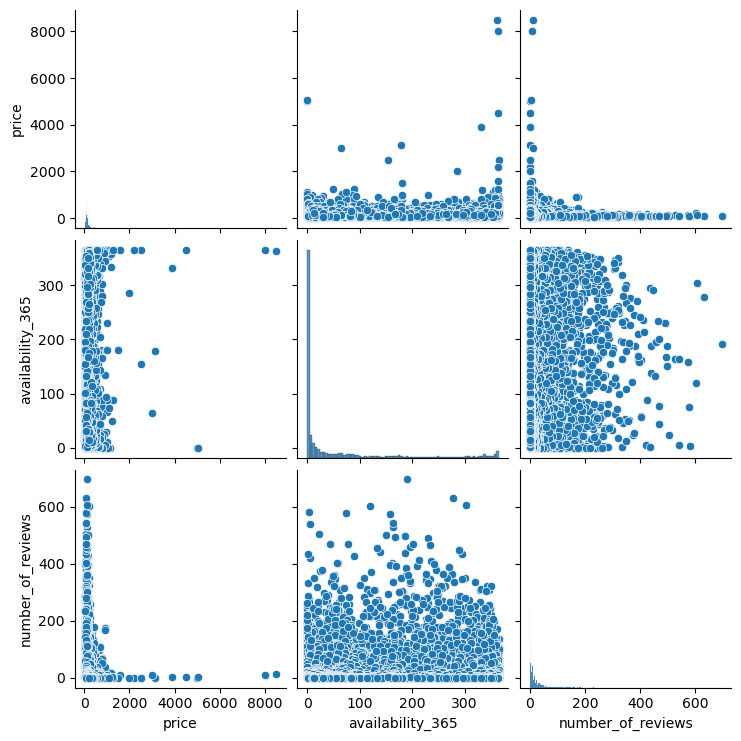

In [224]:
# list of column names
list_columns = ['price', 'availability_365', 'number_of_reviews', 'reviews_per_month', ] 

# Create the pair plot
sns.pairplot(df[list_columns])

# Show the plot
plt.show()

In [220]:
listings_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20030 non-null  object 
 1   name               20030 non-null  object 
 2   neighbourhood      20030 non-null  object 
 3   room_type          20030 non-null  object 
 4   price              20030 non-null  int64  
 5   number_of_reviews  20030 non-null  int64  
 6   reviews_per_month  20030 non-null  float64
 7   availability_365   20030 non-null  int64  
 8   host_is_superhost  20026 non-null  object 
 9   property_type      20030 non-null  object 
 10  bedrooms           20030 non-null  int64  
 11  security_deposit   20030 non-null  float64
 12  cleaning_fee       20030 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 2.0+ MB


In [229]:
#defining and generating pair plot 

ppb = listings_complete[['price', 'number_of_reviews','reviews_per_month', 'availability_365', 'bedrooms', 'security_deposit', 'cleaning_fee']]
sns.pairplot(ppb)

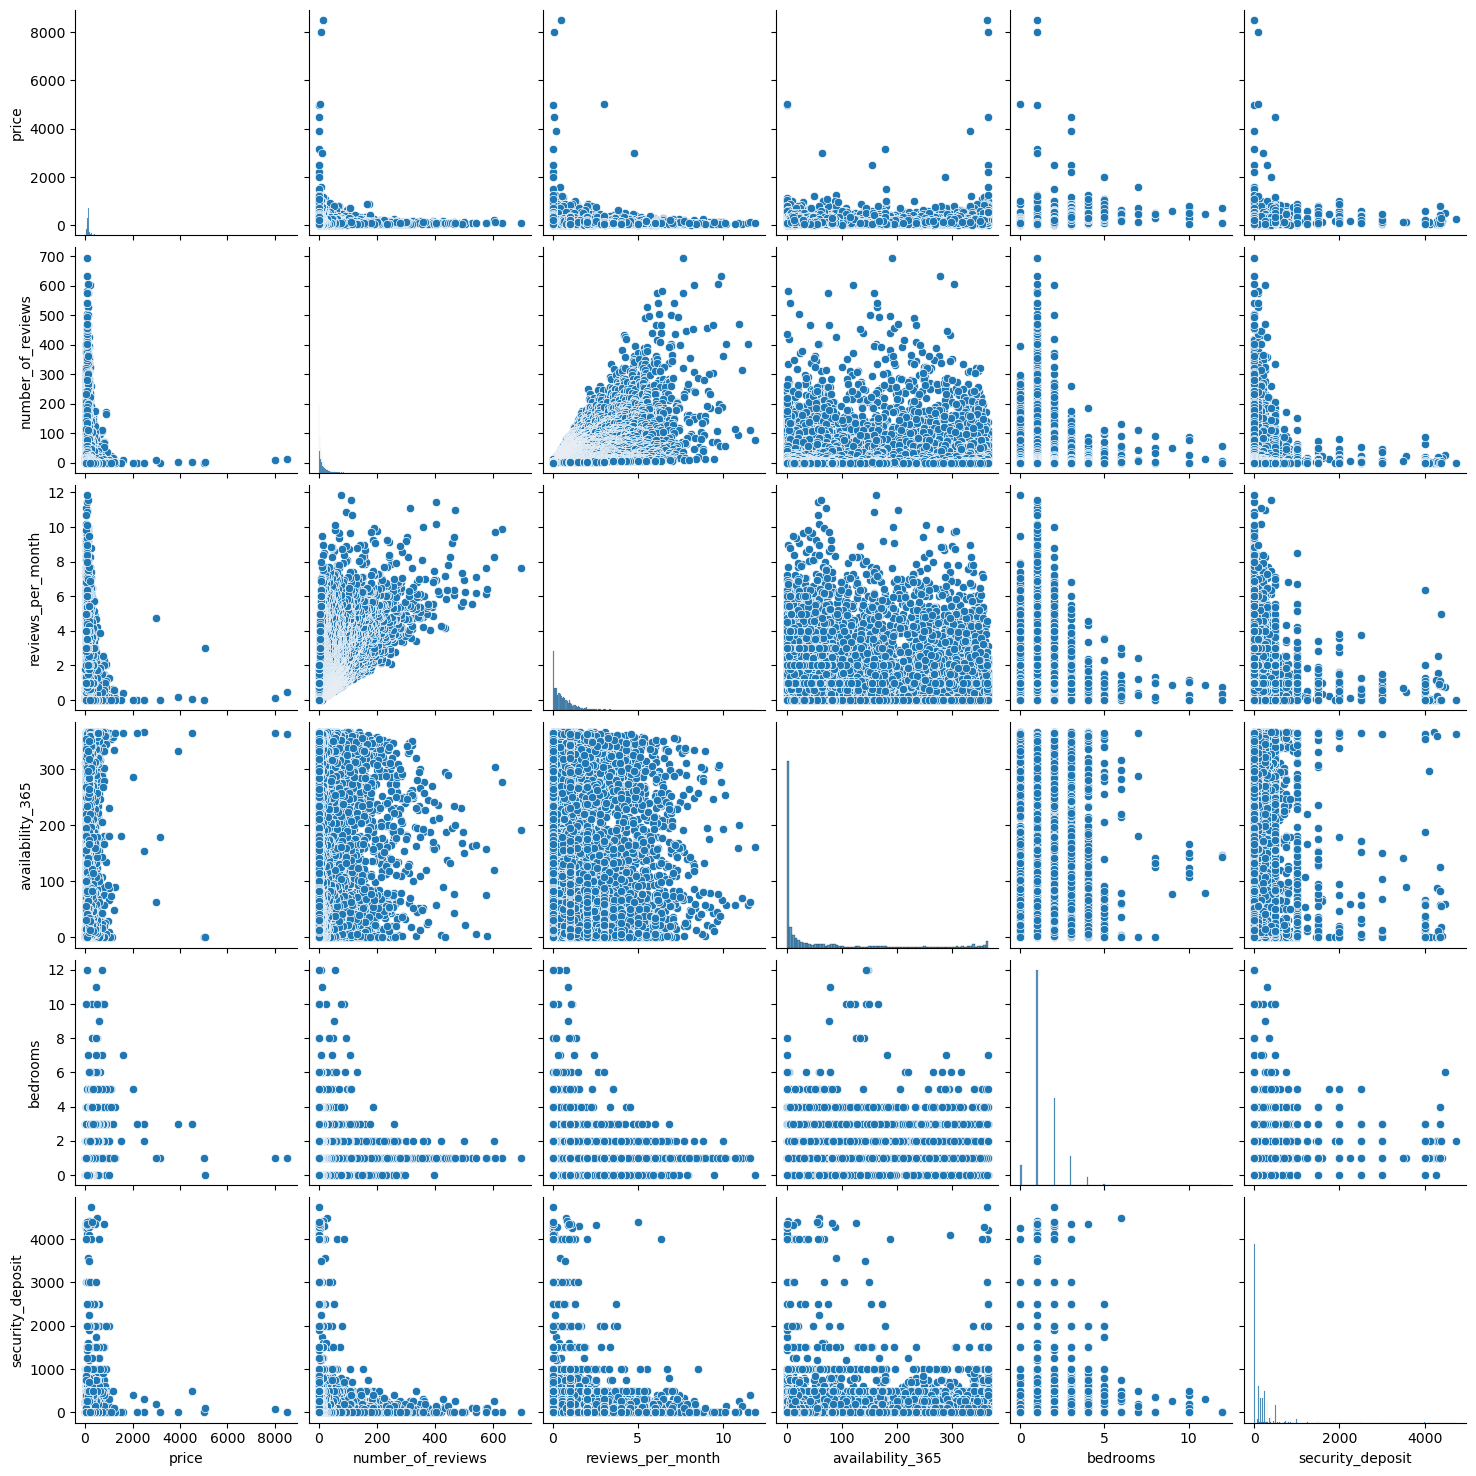

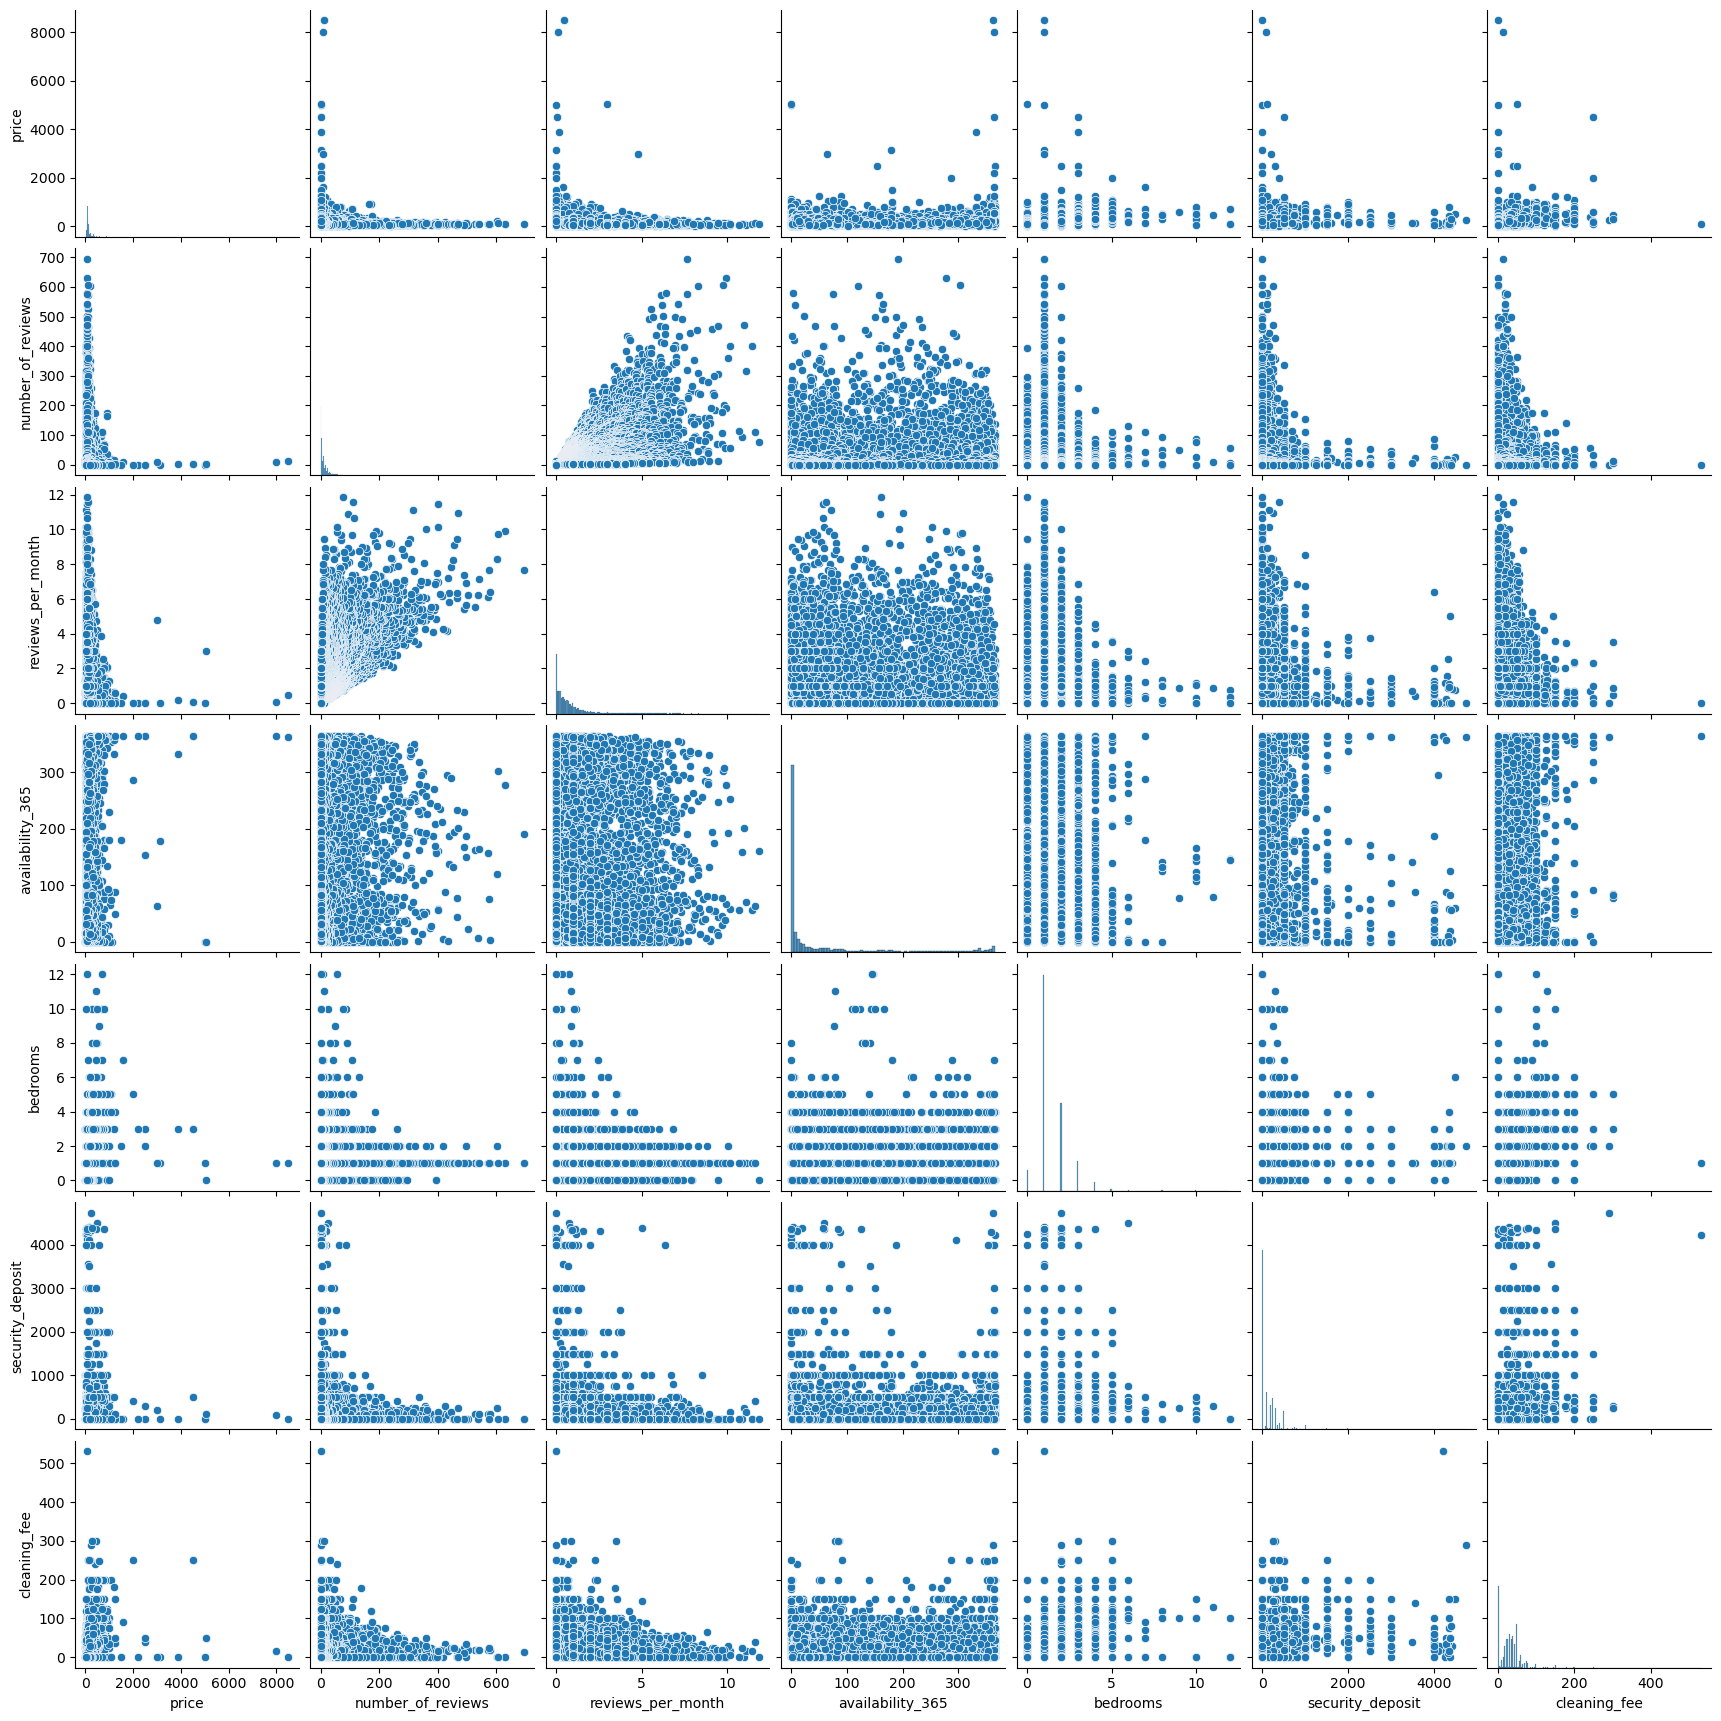

In [232]:
# Show the plot
plt.show()

Cheaper listing has more reviews per month and more amount of reviews, but since they are cheaper they have more rate of occupancy and possibility of being rated.
Listings with higher cleaning fee have less review. 
Cleaning fee is not related to price. 

In [241]:
sns.histplot(listings_complete['price'], bins = 2e0, kde = True)

<Axes: xlabel='price', ylabel='Count'>

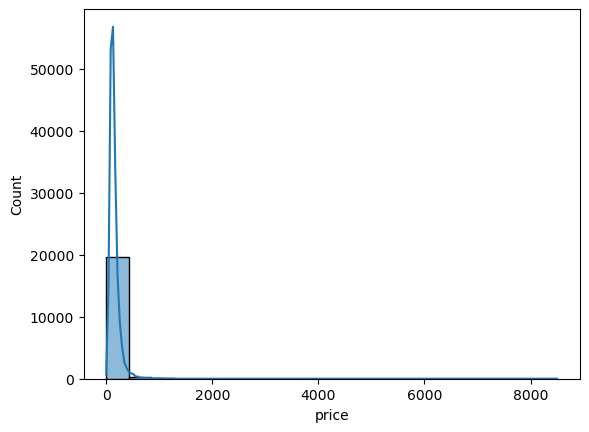

In [247]:
plt.show()

In [290]:
listings_complete.loc[listings_complete['price'] < 200, 'Price category'] = 'Low price'

In [292]:
listings_complete.loc[(listings_complete['price'] >= 200) & (listings_complete['price'] < 600), 'Price category'] = 'Middle price'

In [294]:
listings_complete.loc[listings_complete['price'] >= 600, 'Price category'] = 'High price'

In [296]:
listings_complete['Price category'].value_counts(dropna = False)

Price category
Low price       16344
Middle price     3542
High price        144
Name: count, dtype: int64

In [299]:
listings_complete.columns

Index(['id', 'name', 'neighbourhood', 'room_type', 'price',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'host_is_superhost', 'property_type', 'bedrooms', 'security_deposit',
       'cleaning_fee', 'Price category'],
      dtype='object')

In [306]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="number_of_reviews", y="price", hue="Price category", data=listings_complete)

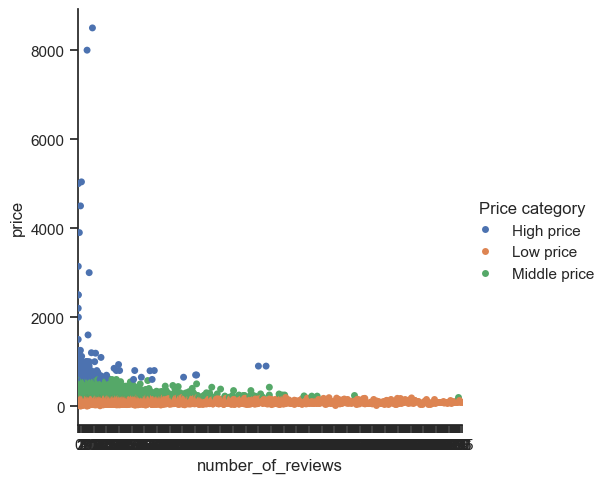

In [309]:
plt.show()

Low price listings have more reviews, but they also have a higher chance of being booked and get the reviews.

Hypothesis: 

* “There is a positive correlation between the number of bedrooms and the price of an Airbnb listing.”
* “Airbnb listings with lower availability, booked more frequently, tend to have higher prices.”
* “Listings in popular neighborhoods in the city center or tourist areas, have higher prices compared to those in less popular areas.”
* “Listings with more reviews tend to have lower prices.”
* “Listings with higher cleaning fees or security deposits tend to have higher overall prices.”


Further Questions to explore:

* Do certain combinations of amenities like free parking, WiFi or kitchen, drive to higher pricing?
* Are there any patterns in pricing based on host response time or booking acceptance rate?
* Which areas of Amsterdam have the highest concentration of high-priced listings?


In [317]:
listings_complete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20030 non-null  object 
 1   name               20030 non-null  object 
 2   neighbourhood      20030 non-null  object 
 3   room_type          20030 non-null  object 
 4   price              20030 non-null  int64  
 5   number_of_reviews  20030 non-null  int64  
 6   reviews_per_month  20030 non-null  float64
 7   availability_365   20030 non-null  int64  
 8   host_is_superhost  20026 non-null  object 
 9   property_type      20030 non-null  object 
 10  bedrooms           20030 non-null  int64  
 11  security_deposit   20030 non-null  float64
 12  cleaning_fee       20030 non-null  float64
 13  Price category     20030 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 2.1+ MB


In [319]:
#export
listings_complete.to_csv(os.path.join(path, 'Data','Prepared Data', 'listings_complete_cleaned.csv'))
